In [267]:
#importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [268]:
#loading data

df = pd.read_csv('tn.movie_budgets.csv')

In [269]:
#viewing the top 5 rows

df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [270]:
#viewing the last 5 rows

df.tail()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
5781,82,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


In [271]:
#more information on the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


The data information shows that there are no missing values.

In [272]:
#changing all the currency values from objects to float

currency_cols = ['production_budget','domestic_gross','worldwide_gross']
for x in currency_cols:
    df[x] = df[x].astype(str).replace({'\$':'',',':''},regex = True)
    df[x] = df[x].astype(float)
    df[x] = df[x].round(0).astype(int)
df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,-2147483648
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [273]:
#check for duplicates

df.duplicated().sum()

0

There are no duplicated entries

In [274]:
#dropping rows where worlwide gross revenue is 0 as they are not helpful in this analysis. 

df = df[df['worldwide_gross'] != 0]
df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,-2147483648
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5775,76,"May 26, 2006",Cavite,7000,70071,71644
5776,77,"Dec 31, 2004",The Mongol King,7000,900,900
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338


In [275]:
#dropping the id column because it is also not helpful in this analysis

df = df.drop('id', axis = 1)

In [276]:
#converting month and date into datetime

df['release_date'] = pd.to_datetime(df['release_date'])
df

,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,2009-12-18,Avatar,425000000,760507625,-2147483648
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,2019-06-07,Dark Phoenix,350000000,42762350,149762350
3,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...
5775,2006-05-26,Cavite,7000,70071,71644
5776,2004-12-31,The Mongol King,7000,900,900
5778,1999-04-02,Following,6000,48482,240495
5779,2005-07-13,Return to the Land of Wonders,5000,1338,1338


In [277]:
#extracting months and years from the release date

df['month'] = df['release_date'].dt.month
df['year'] = df['release_date'].dt.year
df

,release_date,movie,production_budget,domestic_gross,worldwide_gross,month,year
0,2009-12-18,Avatar,425000000,760507625,-2147483648,12,2009
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,5,2011
2,2019-06-07,Dark Phoenix,350000000,42762350,149762350,6,2019
3,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,5,2015
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,12,2017
...,...,...,...,...,...,...,...
5775,2006-05-26,Cavite,7000,70071,71644,5,2006
5776,2004-12-31,The Mongol King,7000,900,900,12,2004
5778,1999-04-02,Following,6000,48482,240495,4,1999
5779,2005-07-13,Return to the Land of Wonders,5000,1338,1338,7,2005


In [278]:
#calculating the profit made by each movie

df['profit'] = (df['worldwide_gross'] - df['production_budget']).astype(int)
df

,release_date,movie,production_budget,domestic_gross,worldwide_gross,month,year,profit
0,2009-12-18,Avatar,425000000,760507625,-2147483648,12,2009,1722483648
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,5,2011,635063875
2,2019-06-07,Dark Phoenix,350000000,42762350,149762350,6,2019,-200237650
3,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,5,2015,1072413963
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,12,2017,999721747
...,...,...,...,...,...,...,...,...
5775,2006-05-26,Cavite,7000,70071,71644,5,2006,64644
5776,2004-12-31,The Mongol King,7000,900,900,12,2004,-6100
5778,1999-04-02,Following,6000,48482,240495,4,1999,234495
5779,2005-07-13,Return to the Land of Wonders,5000,1338,1338,7,2005,-3662


In [279]:
#checking for outliers based on the profit

Q1 = df['profit'].quantile(0.25)  
Q3 = df['profit'].quantile(0.75)  
IQR = Q3 - Q1  

#outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#outliers
outliers = df[(df['profit'] < lower_bound) | (df['profit'] > upper_bound)]
outliers

,release_date,movie,production_budget,domestic_gross,worldwide_gross,month,year,profit
0,2009-12-18,Avatar,425000000,760507625,-2147483648,12,2009,1722483648
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,5,2011,635063875
2,2019-06-07,Dark Phoenix,350000000,42762350,149762350,6,2019,-200237650
3,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,5,2015,1072413963
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,12,2017,999721747
...,...,...,...,...,...,...,...,...
5117,1937-12-21,Snow White and the Seven Dwarfs,1488000,184925486,184925486,12,1937,183437486
5210,1976-11-21,Rocky,1000000,117235147,225000000,11,1976,224000000
5346,1942-08-13,Bambi,858000,102797000,268000000,8,1942,267142000
5406,1999-07-14,The Blair Witch Project,600000,140539099,248300000,7,1999,247700000


In [280]:
#dropping outliers because they represent one off situations where a movie did really well or very poorly

df_clean = df[(df['profit'] >= lower_bound) & (df['profit'] <= upper_bound)]
df_clean

,release_date,movie,production_budget,domestic_gross,worldwide_gross,month,year,profit
11,2018-05-25,Solo: A Star Wars Story,275000000,213767512,393151347,5,2018,118151347
12,2013-07-02,The Lone Ranger,275000000,89302115,260002115,7,2013,-14997885
13,2012-03-09,John Carter,275000000,73058679,282778100,3,2012,7778100
23,2006-06-28,Superman Returns,232000000,200120000,374085065,6,2006,142085065
31,2012-05-18,Battleship,220000000,65233400,313477717,5,2012,93477717
...,...,...,...,...,...,...,...,...
5775,2006-05-26,Cavite,7000,70071,71644,5,2006,64644
5776,2004-12-31,The Mongol King,7000,900,900,12,2004,-6100
5778,1999-04-02,Following,6000,48482,240495,4,1999,234495
5779,2005-07-13,Return to the Land of Wonders,5000,1338,1338,7,2005,-3662


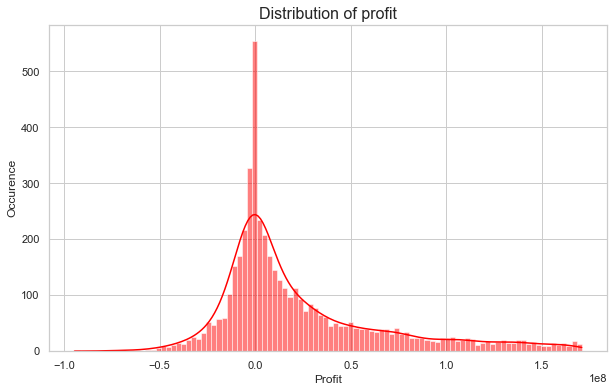

In [281]:
#checking the distribution of profit values using a histogram plot

plt.figure(figsize = (10, 6))
sns.histplot(data=df_clean, x='profit', bins = 100, color = 'red', kde = True)
plt.title('Distribution of profit', fontsize=16)
plt.xlabel('Profit', fontsize=12)
plt.ylabel('Occurence', fontsize=12)
plt.grid(True)
plt.show()

The distribution appears fairly uniform, though the majority of the values fall toward the right side of the graph. This is a positive indicator as it indicates that more than 50% of movies make profit.

In [282]:
#using median to check for central tendency rather than mean due to the skew;
median_value = np.median(df_clean['profit'])
median_value

6967251.0

The median profit amount is $6,967,251. This suggests that atleast half of the movies in the dataset are making profits above this value. Are there any notable trends that contribute to achieving high profits? First let us find out how the industry has been performing over the decades.

In [283]:
#creating a function for line plotting different columns

def plot_line(col_name, data_used):
    years = data_used.groupby('year')[col_name].sum().reset_index()

    #visualising the time series
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=years, x='year', y=col_name, marker='o', color = 'red')
    plt.title(f'Year vs {col_name.capitalize()}', fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel(col_name.capitalize(), fontsize=12)
    plt.grid(True)
    plt.show()

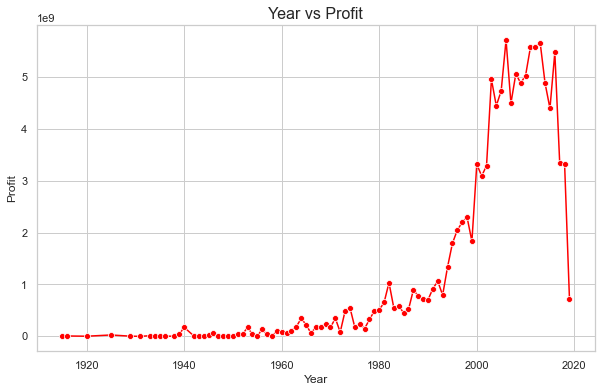

In [284]:
#line plot based on profits

plot_line('profit',df_clean)

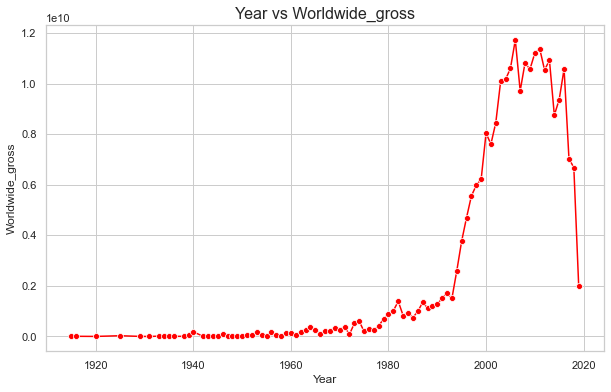

In [285]:
#line plot based on revenue

plot_line('worldwide_gross',df_clean)

From the above plots, we can observe that the industry has grown increasingly popular from the 1980s through the 21st century. 
This trend shows a rising demand for movies, advancements in production, and the global expansion of the audience base. To solidify our deductions, let us first investigate if the production budget increased over the years; rather is there a positive correlation between production budget and years?

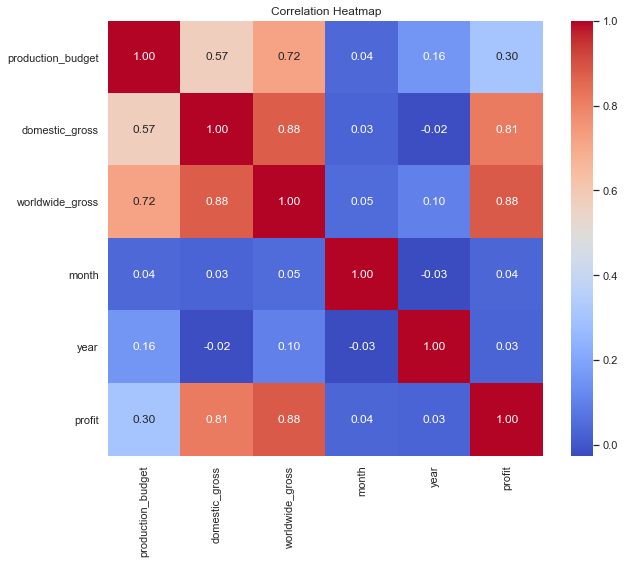

In [286]:
#using a heatmap to check the correlation between columns

#plotting
plt.figure(figsize=(10, 8))
sns.heatmap(df_clean.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title('Correlation Heatmap')
plt.show()



It is evident that gross revenue is strongly correlated with the production budget. To explore this further, let's first examine how production budgets have evolved over the years.

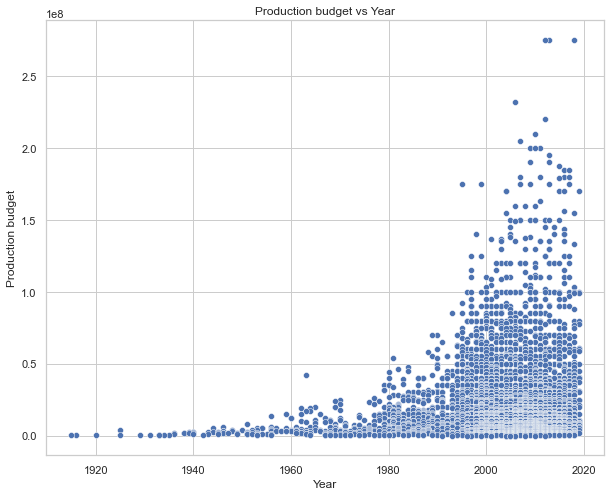

In [287]:
#visualising this correlation using a scatter plot

plt.figure(figsize=(10, 8))

# Scatter plot
sns.scatterplot(x=df_clean['year'], y=df['production_budget'])

# Labels and Title
plt.xlabel("Year")
plt.ylabel("Production budget")
plt.title("Production budget vs Year")

# Show the plot
plt.show()

We can clearly see that the production budget has been increasing over the years. This is may be because of the demand for high-quality visual effects. With this insight, we can ask: Do higher production budgets result in higher revenue? Have the majority of movies with a high production budget accrued good revenue? Using a linear regression, we can be able to determine how much variance in the revenue can be accredited to the production budget.

In [288]:
#creating a function for doing regressions

def regression(a,b):
#defining variables

    X = df_clean[a]
    y = df_clean[b]

    #adding constant

    model = sm.OLS(endog = y, exog = sm.add_constant(X))

    #fitting

    results = model.fit()

    #evaluation of the results
    print(results.summary())

In [289]:
#regression between production_budget and r_o_i
regression(['production_budget'], 'worldwide_gross')

                            OLS Regression Results                            
Dep. Variable:        worldwide_gross   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     5081.
Date:                Sat, 25 Jan 2025   Prob (F-statistic):               0.00
Time:                        17:34:28   Log-Likelihood:                -91518.
No. Observations:                4822   AIC:                         1.830e+05
Df Residuals:                    4820   BIC:                         1.831e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.233e+07   8.02e+0

Interpretation of the simple regression:
1. R-squared = 0.513 meaning that the variance of the revenue can be explained by the production budget 51% of the time. 
2. p-value =  0.00 which is less than 0.05 meaning that the model is statistically significant.
3. constant = 1.233e+07 means that when production budget is 0, estimated value of the revenue is 1.233e+07
4. coef = 1.4521 suggests that for every unit increase in the production budget, revenue increases by 1.4521 units.

The model confirms that higher production budgets are associated with higher worldwide gross revenues. On average, every dollar spent on production results in an additional $1.4521 in gross revenue.

Another intriguing question to consider is whether there are specific high seasons throughout the year for this industry. We can easily answer this using a bar plot.

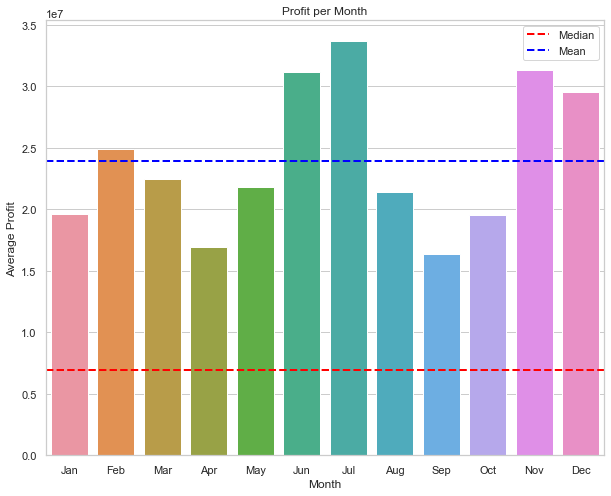

In [290]:
#grouping profit into months
profit_per_month = df_clean.groupby('month')['profit'].mean().reset_index()

plt.figure(figsize=(10, 8))

# Bar plot
sns.barplot(x=profit_per_month['month'], y=profit_per_month['profit'])

# Labels and Title
plt.xlabel("Month")
plt.ylabel("Average Profit")
plt.title("Profit per Month")
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

#adding the line of central tendency
mean_value = np.mean(df_clean['profit'])
plt.axhline(median_value, color='red', linestyle='dashed', linewidth=2, label = 'Median')
plt.axhline(mean_value, color='blue', linestyle='dashed', linewidth=2, label = 'Mean')
plt.legend()

# Show the plot
plt.show()



The industry appears to perform better than average in mid year, that is June and July, and end year in November and December. Therefore, it may be advisable for the client to schedule their release dates during these months to maximize potential returns.

What percentage of the worldwide gross is foreign gross? For this point, using the un-altered data is sensible because it provides a complete and accurate depiction of the relationship between foreign gross and worldwide gross, capturing both typical and extreme performances. Including outliers ensures that the analysis reflects the true diversity of the industry’s performance without bias. 

In [291]:
#adding column for foreign gross

df['foreign_gross'] = df['worldwide_gross'] - df['domestic_gross']
df

,release_date,movie,production_budget,domestic_gross,worldwide_gross,month,year,profit,foreign_gross
0,2009-12-18,Avatar,425000000,760507625,-2147483648,12,2009,1722483648,1386976023
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,5,2011,635063875,804600000
2,2019-06-07,Dark Phoenix,350000000,42762350,149762350,6,2019,-200237650,107000000
3,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,5,2015,1072413963,944008095
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,12,2017,999721747,696540365
...,...,...,...,...,...,...,...,...,...
5775,2006-05-26,Cavite,7000,70071,71644,5,2006,64644,1573
5776,2004-12-31,The Mongol King,7000,900,900,12,2004,-6100,0
5778,1999-04-02,Following,6000,48482,240495,4,1999,234495,192013
5779,2005-07-13,Return to the Land of Wonders,5000,1338,1338,7,2005,-3662,0


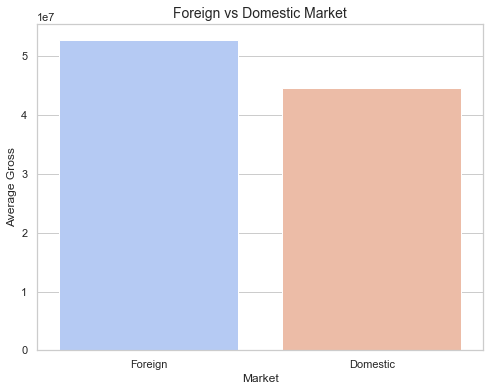

In [292]:
#visualising the comparison between the domestic and foerign market

average_foreign = df['foreign_gross'].mean()
average_domestic = df['domestic_gross'].mean()

#creating a dataframe for the purposes of plotting
avg_data = pd.DataFrame({
    'Market': ['Foreign', 'Domestic'],
    'Average Gross': [average_foreign, average_domestic]
})

#plotting
plt.figure(figsize=(8, 6))
sns.barplot(data=avg_data, x='Market', y='Average Gross', palette = 'coolwarm',)
plt.title('Foreign vs Domestic Market', fontsize=14)
plt.xlabel('Market', fontsize=12)
plt.ylabel('Average Gross', fontsize=12)
plt.show()

From the above, we can clearly see that the foregin market is a great contributer in the industry. To solidify our second deduction of expansion of the audience base over the years leading to the rising trend in performance for the industry, let us see how the foreign markert has evolved over the years using a line plot

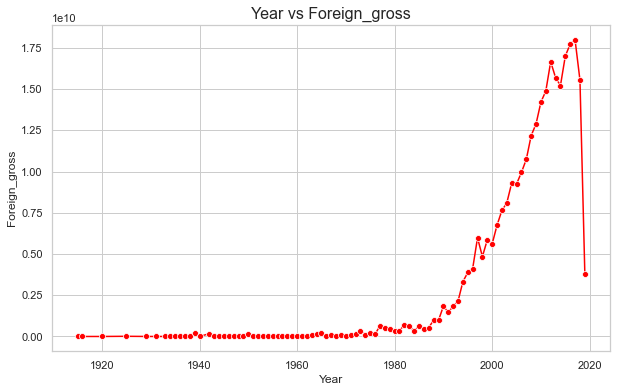

In [293]:
#lineplot of foreign_gross vs year

plot_line('foreign_gross', df)

From the above plot, there is a clear rising trend in the foreign market especially from the 1990s. 